**1.导入需要的库**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.model_selection import train_test_split #测试集训练集分裂
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn.model_selection import GridSearchCV #网格搜索

**2.导入数据集，探索数据**

In [2]:
data=pd.read_csv('04data.csv')

In [3]:
data.info() #探索数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


有891行。<br>
object不是连续型，但是DecisionTreeClassifier的特征必须是数字类型，所以所有object的对象如果要留下必须转换成数字。<br>
年龄有缺失值，需要处理。<br>

In [4]:
data.head() #探索数据，显示前5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3.数据预处理**

（1）筛选特征

In [5]:
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1) #删除3个特征（Cabin缺失值也太多），覆盖原表，axis=1删除列

In [6]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


（2）处理缺失值

In [7]:
data["Age"] = data["Age"].fillna(data["Age"].mean()) #用均值填补年龄缺失值

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
data = data.dropna() #删除Embarked缺失的记录，axis=0(默认)删除行

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


（3）将Sex和Embarked转化为数字

In [11]:
data["Sex"].unique() #Sex中都有哪些取值

array(['male', 'female'], dtype=object)

In [12]:
data["Embarked"].unique() #Embarked中都有哪些取值

array(['S', 'C', 'Q'], dtype=object)

In [13]:
labels = data["Embarked"].unique().tolist() #转化成列表
labels

['S', 'C', 'Q']

In [14]:
labels.index('S')

0

In [15]:
#将S转化为0，将C转化为1，将Q转化为2，即转化成各自的索引
data.loc[:,"Embarked"] = data.loc[:,"Embarked"].apply(lambda x:labels.index(x))
data

D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [16]:
data.loc[:,"Sex"] = (data["Sex"] == "male").astype("int") #把布尔值(True)转化为整数(1)，男→1

D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0-1。

In [17]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


**4.提取标签和特征矩阵，分测试集和训练集**

In [18]:
data.columns != "Survived" #取出返回True的列

array([ True, False,  True,  True,  True,  True,  True,  True,  True])

In [19]:
x = data.iloc[:,data.columns != "Survived"] #取出特征矩阵
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [20]:
y =data.iloc[:,data.columns == "Survived"] #取出标签
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [21]:
#分训练集70%和测试集30%
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [22]:
Xtrain #索引变乱了

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
714,715,2,1,52.000000,0,0,13.0000,0
689,690,1,0,15.000000,0,1,211.3375,0
117,118,2,1,29.000000,1,0,21.0000,0
382,383,3,1,32.000000,0,0,7.9250,0
155,156,1,1,51.000000,0,1,61.3792,1
...,...,...,...,...,...,...,...,...
820,821,1,0,52.000000,1,1,93.5000,0
235,236,3,0,29.699118,0,0,7.5500,0
590,591,3,1,35.000000,0,0,7.1250,0
165,166,3,1,9.000000,0,2,20.5250,0


In [23]:
Xtrain.shape

(622, 8)

In [24]:
#使索引有序
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [25]:
Xtrain #索引已纠正

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,715,2,1,52.000000,0,0,13.0000,0
1,690,1,0,15.000000,0,1,211.3375,0
2,118,2,1,29.000000,1,0,21.0000,0
3,383,3,1,32.000000,0,0,7.9250,0
4,156,1,1,51.000000,0,1,61.3792,1
...,...,...,...,...,...,...,...,...
617,821,1,0,52.000000,1,1,93.5000,0
618,236,3,0,29.699118,0,0,7.5500,0
619,591,3,1,35.000000,0,0,7.1250,0
620,166,3,1,9.000000,0,2,20.5250,0


**5.导入模型，粗略跑一下查看结果**

In [26]:
#训练集测试集
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7715355805243446

In [27]:
#交叉验证
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7469611848825333

**6.调参——max_depth**

0.8166624106230849


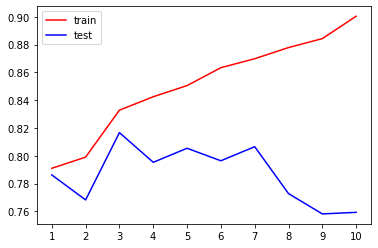

In [30]:
tr = [] #存储训练集分数
te = [] #存储测试集分数
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1 #看图说明3最好
                                ,criterion="entropy" #画图后添加的
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain) #训练集的分数
    score_te = cross_val_score(clf,x,y,cv=10).mean() #测试集的分数，使用交叉验证
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train") #训练集分数
plt.plot(range(1,11),te,color="blue",label="test") #测试集分数
plt.xticks(range(1,11)) #横坐标显示1到10的整数
plt.legend()
plt.show()

**7.调参——剪枝**

网格搜索：能够帮助我们同时调整多个参数的技术，本质是枚举技术。请帮我调整这些参数，在这些取值范围内的取值能让模型达到最好的组合。计算量大，耗时间。

In [31]:
#parameters是一串参数和这些参数对应的取值范围
parameters = {"criterion":("gini","entropy")
             ,"splitter":("best","random")
             ,"max_depth":[*range(1,10)]
             ,"min_samples_leaf":[*range(1,50,5)]
             ,"min_impurity_decrease":[*np.linspace(0,0.5,50)] #当信息增益小于min_impurity_decrease时，该节点不再进行分枝
}

clf = DecisionTreeClassifier(random_state=25) #实例化
GS = GridSearchCV(clf, parameters, cv=10) #同时满足fit、score和交叉验证（10折）
GS = GS.fit(Xtrain,Ytrain)

网格搜索的两个接口：

In [32]:
GS.best_params_ #返回最佳参数组合

{'criterion': 'entropy',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [33]:
GS.best_score_ #网格搜索后的模型的评判标准

0.8166666666666667

使用网格搜索可能不如最初调参时候的模型，因为网格搜索无法舍弃参数。